In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
defense_df = pd.read_csv('defensiveNFL_Data.csv')
defense_df.set_index("Pos", inplace=True)
defense_df.head()

,Unnamed: 0,Year,Player,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,...,Interceptions,Rush Attempts,Rush Yards,Rush TDs,Receptions,Receiving Yards,Receiving TDs,Tackles,Picks,Sacks
Pos,,,,,,,,,,,,,,,,,,,,,
DT,0,2000,Brian Young,74.0,278.0,4.94,29.5,27.0,106.0,7.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,1.0,22.5
DT,1,2000,Cedric Woodard,74.0,290.0,5.21,30.5,23.0,109.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,1.0
LB,2,2000,Antonio Wilson,74.0,245.0,4.56,0.0,11.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
DT,3,2000,Josh Williams,75.0,282.0,4.90,30.5,0.0,111.0,7.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,8.0
DB,4,2000,Damen Wheeler,69.0,179.0,4.51,35.0,11.0,115.0,7.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0


In [6]:
X = defense_df[['Pro Bowl']]
y = defense_df["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1630, 1) (1630, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

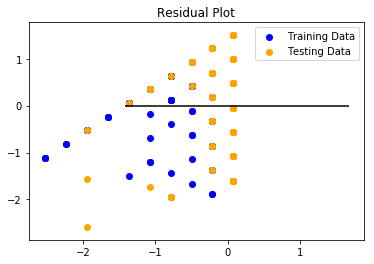

In [11]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X)


mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 18.34756640558577
R-squared (R2 ): -3.896573768206297


In [13]:
model.score(X, y)

-3.8965737682062973

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.score(X_test, y_test)

0.027087993388275833

In [17]:
X = defense_df.drop(columns=['Unnamed: 0', 'Year', 'Player', 'Height', 'Wt', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted', 'Round', 'Pick', 'Age', 'Team', 'All Pro', "AV", "Tackles", "Picks", "Sacks", 'Games', 'Pass Completions', 'Interceptions', 'Pass Attempts', 'Pass Yards', 'Pass TDs', 'Rush Attempts', 'Rush Yards', 'Rush TDs', 'Receptions', 'Receiving Yards', 'Receiving TDs'])
y = defense_df["Round"]
print(X.shape, y.shape)

(1630, 1) (1630,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.2144026186579378
Testing Data Score: 0.2107843137254902


In [22]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
First 10 Actual labels: [4.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 1.0]


In [23]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,3.0,4.0
1,3.0,4.0
2,3.0,2.0
3,3.0,5.0
4,3.0,4.0
5,3.0,3.0
6,3.0,3.0
7,3.0,2.0
8,3.0,3.0
9,3.0,1.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
target = defense_df["Round"]
target_names = ["1", "2", "3", "4", "5", "6", "7", "0"]

In [28]:
data = defense_df.drop(columns=['Unnamed: 0', 'Year', 'Player', 'Height', 'Wt', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted', 'Round', 'Pick', 'Age', 'Team', 'All Pro', "AV", "Tackles", "Picks", "Sacks", 'Games', 'Pass Completions', 'Pass Attempts', 'Pass Yards', 'Pass TDs', 'Interceptions', 'Rush Yards', 'Rush TDs', 'Rush Attempts', 'Receptions', 'Receiving Yards', 'Receiving TDs'])
feature_names = data.columns
data.head()

,Pro Bowl
Pos,
DT,0
DT,0
LB,0
DT,0
DB,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 0.199/0.176
k: 3, Train/Test Score: 0.177/0.154
k: 5, Train/Test Score: 0.195/0.172
k: 7, Train/Test Score: 0.202/0.184
k: 9, Train/Test Score: 0.169/0.174
k: 11, Train/Test Score: 0.202/0.184
k: 13, Train/Test Score: 0.202/0.184
k: 15, Train/Test Score: 0.215/0.208
k: 17, Train/Test Score: 0.215/0.208
k: 19, Train/Test Score: 0.215/0.208


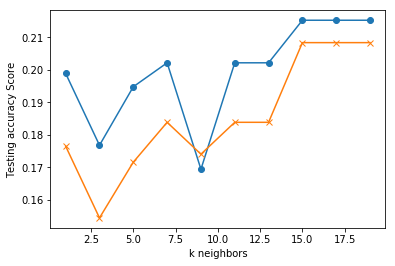

In [30]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.184


In [32]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.179


In [34]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

          1       0.47      0.28      0.36        67
          2       0.00      0.00      0.00        55
          3       0.00      0.00      0.00        70
          4       0.15      0.95      0.25        57
          5       0.00      0.00      0.00        60
          6       0.00      0.00      0.00        55
          7       0.00      0.00      0.00        44

avg / total       0.10      0.18      0.09       408



/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 7, does not match size of target_names, 8
  .format(len(labels), len(target_names))
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
